In [ ]:
%pip install numpy
%pip install pandas_datareader
%pip install matplotlib
%pip install pandas_datareader

import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import pandas_datareader as data # type: ignore

plt.style.use('fivethirtyeight')


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.


In [62]:
%pip install yfinance
import yfinance as yf # type: ignore
import datetime as dt

stock = 'POWERGRID.NS'
start = dt.datetime(2000,1,1)
end = dt.datetime(2024,11,1)

df = yf.download(stock,start,end)


[*********************100%***********************]  1 of 1 completed


In [7]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2007-10-05,32.385567,35.250692,26.767990,28.908787,855215656
2007-10-08,30.727673,33.480125,30.534517,33.480125,126671715
2007-10-09,32.820179,33.109910,29.085858,30.743766,116725709
2007-10-10,33.126007,33.802049,32.836276,33.673278,67931378
2007-10-11,36.828129,38.630905,32.836270,38.630905,106320954


In [8]:
df.shape


(4208, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4208 entries, 2007-10-05 to 2024-10-31
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Close, POWERGRID.NS)   4208 non-null   float64
 1   (High, POWERGRID.NS)    4208 non-null   float64
 2   (Low, POWERGRID.NS)     4208 non-null   float64
 3   (Open, POWERGRID.NS)    4208 non-null   float64
 4   (Volume, POWERGRID.NS)  4208 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 197.2 KB


In [10]:
df.isnull().sum()

Price   Ticker      
Close   POWERGRID.NS    0
High    POWERGRID.NS    0
Low     POWERGRID.NS    0
Open    POWERGRID.NS    0
Volume  POWERGRID.NS    0
dtype: int64

In [11]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
count,4208.000000,4208.000000,4208.000000,4208.000000,4.208000e+03
mean,79.255945,80.286305,78.238144,79.292803,1.188963e+07
std,63.621687,64.365266,62.829875,63.603316,2.061999e+07
min,18.908403,20.212431,16.952362,20.114628,0.000000e+00
25%,36.349705,36.923179,35.812870,36.386933,4.799653e+06
50%,55.232328,55.870061,54.493148,55.338366,8.344398e+06
75%,82.704765,83.691964,81.724064,82.727267,1.362032e+07
max,356.113861,356.893408,348.074624,354.749603,8.552157e+08


In [12]:
df = df.reset_index()

In [13]:
df.shape

(4208, 6)

In [14]:
df.columns

MultiIndex([(  'Date',             ''),
            ( 'Close', 'POWERGRID.NS'),
            (  'High', 'POWERGRID.NS'),
            (   'Low', 'POWERGRID.NS'),
            (  'Open', 'POWERGRID.NS'),
            ('Volume', 'POWERGRID.NS')],
           names=['Price', 'Ticker'])

In [15]:
df.to_csv('powergrid.csv')

In [16]:
data01 = pd.read_csv('powergrid.csv')

In [17]:
data01.head()

,Price,Date,Close,High,Low,Open,Volume
0,Ticker,NaN,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
1,0,2007-10-05,32.38556671142578,35.250692053827606,26.767990316905017,28.9087865499696,855215656
2,1,2007-10-08,30.727672576904297,33.48012486897146,30.53451718745854,33.48012486897146,126671715
3,2,2007-10-09,32.8201789855957,33.109909879074095,29.08585756305142,30.743766243977518,116725709
4,3,2007-10-10,33.126007080078125,33.8020487537738,32.83627618174463,33.67327776759036,67931378


In [ ]:
#candLesticks
import plotly.graph_objects as go  # type: ignore
fig = go.Figure(data=[go.Candlestick(x=data01['Date'], open=data01['Open'], high=data01['High'], low=data01['Low'], close=data01['Close'])])
fig.update_layout(xaxis_rangeslider_visible = False)
fig.show()

In [19]:
df = df.drop(['Date'], axis= 1)

c:\Users\satht\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [20]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,32.385567,35.250692,26.767990,28.908787,855215656
1,30.727673,33.480125,30.534517,33.480125,126671715
2,32.820179,33.109910,29.085858,30.743766,116725709
3,33.126007,33.802049,32.836276,33.673278,67931378
4,36.828129,38.630905,32.836270,38.630905,106320954


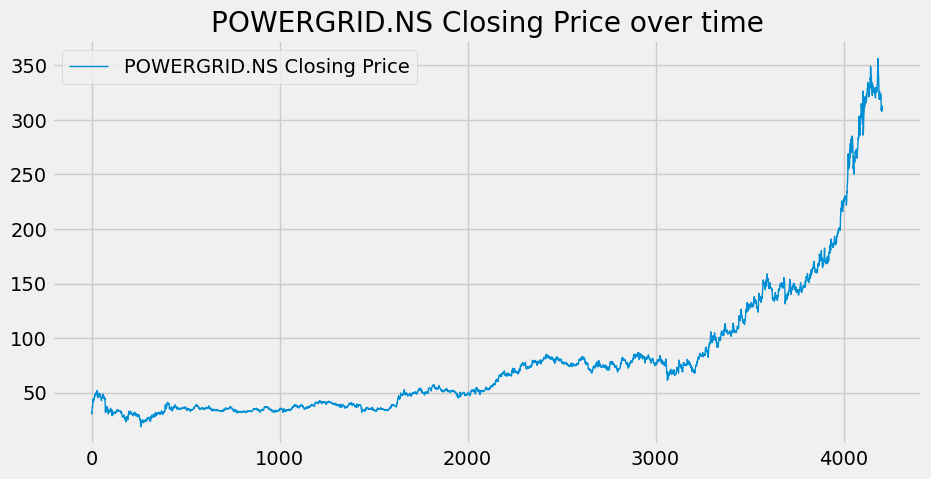

In [21]:
plt.figure(figsize=(10,5))
plt.plot(df['Close'], label = f'{stock} Closing Price', linewidth = 1 )
plt.title(f'{stock} Closing Price over time')
plt.legend()
plt.show()

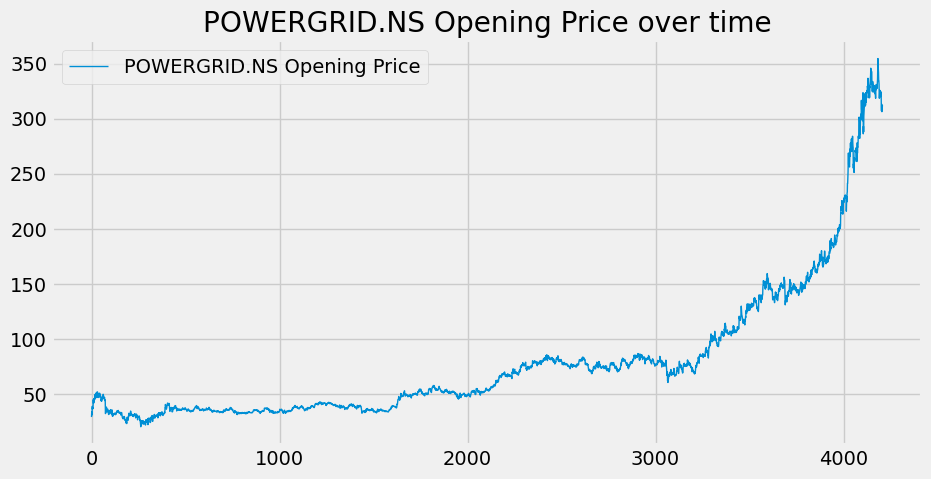

In [22]:
plt.figure(figsize=(10,5))
plt.plot(df['Open'], label = f'{stock} Opening Price', linewidth = 1 )
plt.title(f'{stock} Opening Price over time')

plt.legend()
plt.show()

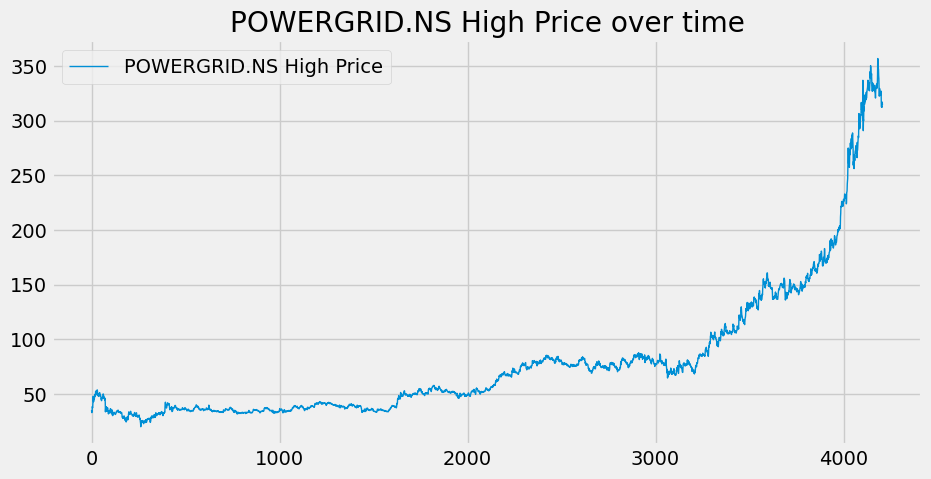

In [23]:
plt.figure(figsize=(10,5))
plt.plot(df['High'], label = f'{stock} High Price', linewidth = 1 )
plt.title(f'{stock} High Price over time')

plt.legend()
plt.show()

In [24]:
temp_data = [10,20,30,40,50,60,70,80,90]
print (sum(temp_data[2:3])/5)

6.0


In [ ]:
df01 = pd.DataFrame(temp_data)
df01

,0
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90


In [26]:
df01.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0


In [27]:
ma100 = df.Close.rolling(100).mean()

In [28]:
ma100

Ticker,POWERGRID.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4203,324.993563
4204,325.235133
4205,325.471086
4206,325.670629


In [29]:
ma200 = df.Close.rolling(200).mean()

In [30]:
ma200

Ticker,POWERGRID.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4203,297.117670
4204,297.541902
4205,297.956184
4206,298.361186


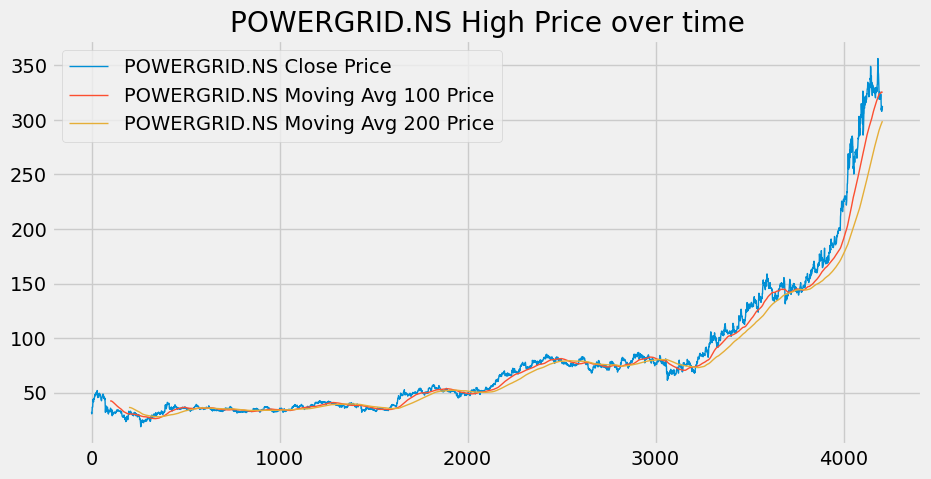

In [31]:
plt.figure(figsize=(10,5))
plt.plot(df['Close'], label = f'{stock} Close Price', linewidth = 1 )
plt.plot(ma100, label = f'{stock} Moving Avg 100 Price', linewidth = 1 )
plt.plot(ma200, label = f'{stock} Moving Avg 200 Price', linewidth = 1 )
plt.title(f'{stock} High Price over time')

plt.legend()
plt.show()

In [32]:
ema100 = df.Close.ewm(span=100, adjust= False).mean()

In [33]:
ema200 = df['Close'].ewm(span=200, adjust= False).mean()

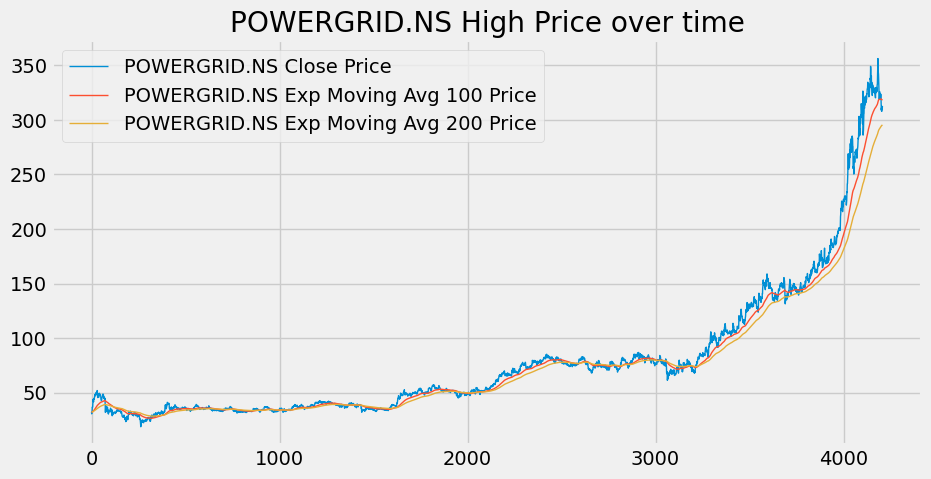

In [34]:
plt.figure(figsize=(10,5))
plt.plot(df['Close'], label = f'{stock} Close Price', linewidth = 1 )
plt.plot(ema100, label = f'{stock} Exp Moving Avg 100 Price', linewidth = 1 )
plt.plot(ema200, label = f'{stock} Exp Moving Avg 200 Price', linewidth = 1 )
plt.title(f'{stock} High Price over time')

plt.legend()
plt.show()

In [35]:
#Testing & Training
data_training= pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing= pd.DataFrame(df['Close'][int(len(df)*0.70) : int(len(df))])


In [36]:
data_testing.shape

(1263, 1)

In [37]:
data_training.shape

(2945, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler # type: ignore

scaler = MinMaxScaler(feature_range= (0,1))

In [39]:
data_training_array = scaler.fit_transform(data_training)

In [85]:
data_training_array

array([[0.1980858 ],
       [0.17371825],
       [0.20447369],
       ...,
       [0.9077441 ],
       [0.86000364],
       [0.87299651]])

In [40]:
data_training_array.shape[0]

2945

In [41]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [42]:
x_train.shape

(2845, 100, 1)

In [ ]:
#model Building 
%pip install tensorflow

from keras.layers import Dense, Dropout, LSTM # type: ignore
from keras.models import Sequential # type: ignore

Note: you may need to restart the kernel to use updated packages.


In [44]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences= True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences= True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units= 1))

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [46]:
model.compile(optimizer= 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
89/89 [==============================] - 22s 202ms/step - loss: 0.0332
Epoch 2/50
89/89 [==============================] - 19s 214ms/step - loss: 0.0079
Epoch 3/50
89/89 [==============================] - 20s 223ms/step - loss: 0.0069
Epoch 4/50
89/89 [==============================] - 19s 216ms/step - loss: 0.0064
Epoch 5/50
89/89 [==============================] - 21s 240ms/step - loss: 0.0061
Epoch 6/50
89/89 [==============================] - 17s 189ms/step - loss: 0.0055
Epoch 7/50
89/89 [==============================] - 18s 205ms/step - loss: 0.0059
Epoch 8/50
89/89 [==============================] - 19s 213ms/step - loss: 0.0049
Epoch 9/50
89/89 [==============================] - 21s 233ms/step - loss: 0.0048
Epoch 10/50
89/89 [==============================] - 30s 336ms/step - loss: 0.0043
Epoch 11/50
89/89 [==============================] - 30s 335ms/step - loss: 0.0049
Epoch 12/50
89/89 [==============================] - 32s 357ms/step - loss: 0.0045
Epoch 13/50
8

In [48]:
past_100_days = data_training.tail(100)

In [49]:
final_df = past_100_days.append(data_testing, ignore_index= True)

In [50]:
final_df.head()

Ticker,POWERGRID.NS
0,75.731819
1,77.275726
2,77.539818
3,77.377304
4,77.824226


In [51]:
input_data = scaler.fit_transform(final_df)

In [52]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

In [53]:
x_test.shape

(1263, 100, 1)

In [54]:
y_test.shape

(1263,)

In [55]:
y_predicated = model.predict(x_test)

40/40 [==============================] - 3s 56ms/step


In [56]:
y_predicated.shape

(1263, 1)

In [57]:
scaler.scale_

array([0.00339369])

In [58]:
scaler_factor = 1/0.00339369
y_predicated = y_predicated * scaler_factor
y_test = y_test * scaler_factor

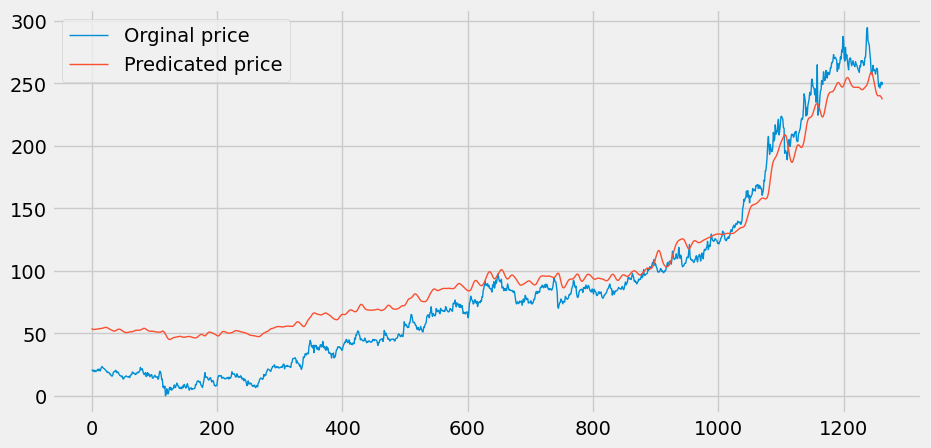

In [59]:
plt.figure(figsize=(10,5))
plt.plot(y_test, label = 'Orginal price', linewidth = 1)
plt.plot(y_predicated , label = 'Predicated price', linewidth = 1)

plt.legend()
plt.show()

In [60]:
model.save('stock_dl_model.h5')